In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [3]:
df.head(10)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,5,Mexico,North America,56.446.821,452524,781.054,72.27
6,6,Colombia,South America,36.951.213,740075,416.626,"88.691,5"
7,7,Australia,Oceania,34.403.004,"1.373,406",447.204,"76.929,1"
8,8,Guatemala,North America,33.533.403,"1.938,114",259.85,"129.049,3"
9,9,United States of America,North America,29.926.210,91304,370.53,80.766


In [4]:
df.shape

(103, 7)

### Data Cleaning

In [5]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')

In [6]:
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')

In [7]:
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')

In [8]:
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [9]:
df.sample(10)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
8,8,Guatemala,North America,33533403,1938.114,25985,129049.3
97,97,Spain,Europe,394,8,9,43596.5
2,2,China,Asia,123059739,88287,1675215,73459.1
99,99,Djibouti,Africa,53,51,NaN,NaN
82,82,Cape Verde,Africa,28375,52152,1296,21888.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
59,59,Cambodia,Asia,610878,38014,27387,22305.5
85,85,Bhutan,Asia,146,20079,467,31252.7
86,86,Benin,Africa,12017,1058,598,20095.3
64,64,Taiwan,Asia,3958,16788,5917,66896.6


In [10]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [11]:
df[df['Acreage (Hectare)'].isna()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(102, 7)

In [14]:
df = df.reset_index()

In [15]:
df

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8


In [16]:
df = df.drop(['index','Unnamed: 0'],axis=1)

In [17]:
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [18]:
df['Production (Tons)'] = df['Production (Tons)'].astype(float)

In [19]:
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].astype(float)
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].astype(float)
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].astype(float)

In [20]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

### Univariate Analysis

In [21]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

In [22]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

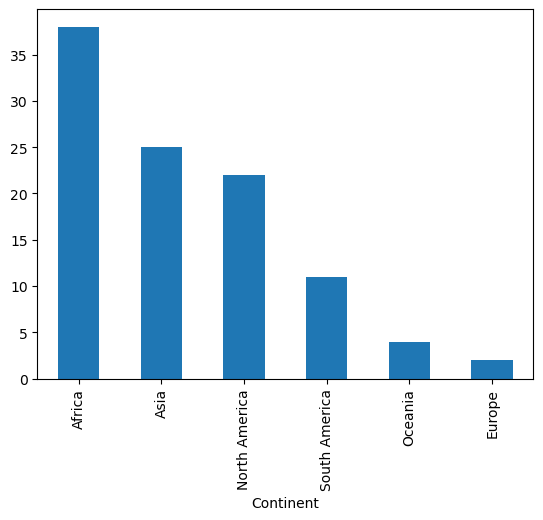

In [23]:
df['Continent'].value_counts().plot(kind='bar')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4356\3891366140.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production (Tons)'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4356\3891366140.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production per Person (Kg)'])
C:\Users\Admi

<Axes: xlabel='Acreage (Hectare)', ylabel='Density'>

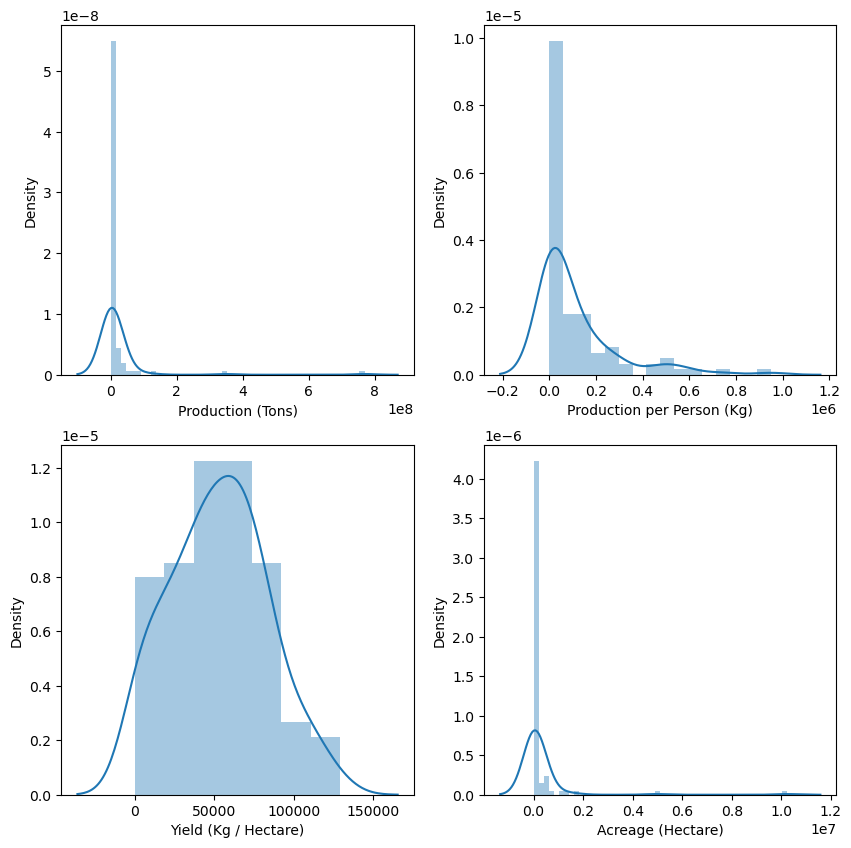

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production (Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production per Person (Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Yield (Kg / Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Acreage (Hectare)'])

<Axes: >

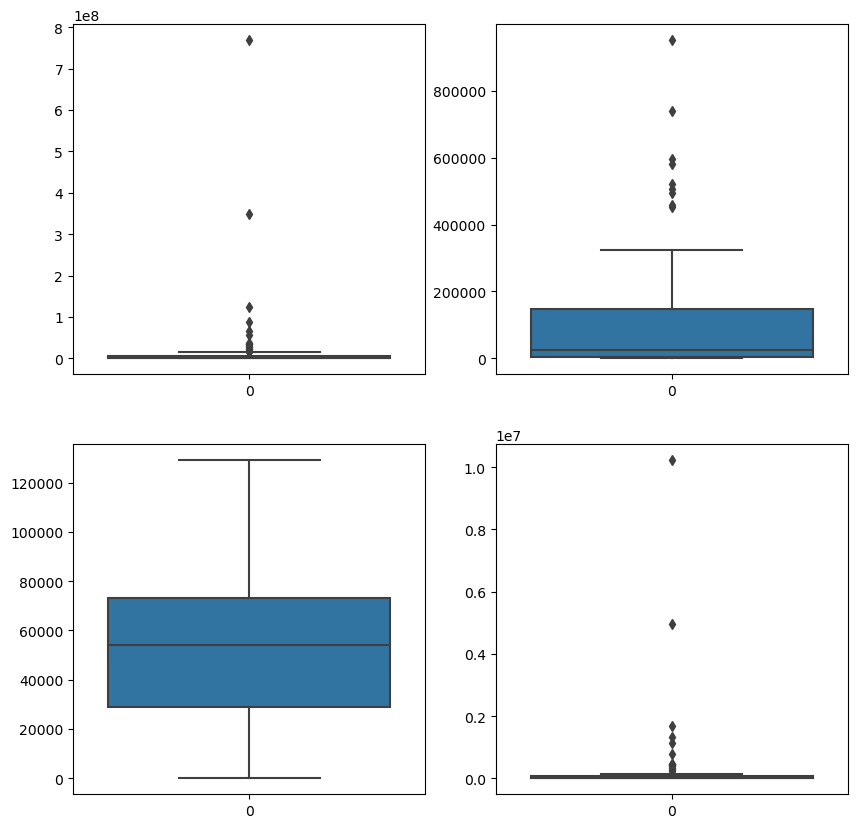

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production (Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production per Person (Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Yield (Kg / Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Acreage (Hectare)'])

In [26]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### Bivariate Analysis

Which country produces the highest amount of Sugarcane?

In [27]:
df_new = df[['Country','Production (Tons)']].set_index('Country')

In [28]:
df_new['Percentage'] = df_new['Production (Tons)']*100/df_new['Production (Tons)'].sum()

In [29]:
df_new

,Production (Tons),Percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Percentage'>

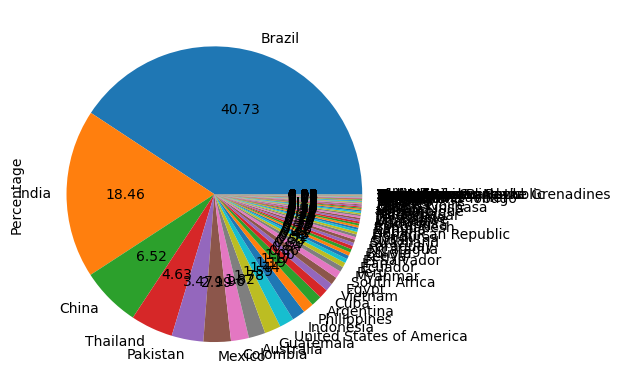

In [30]:
df_new['Percentage'].plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Country'>

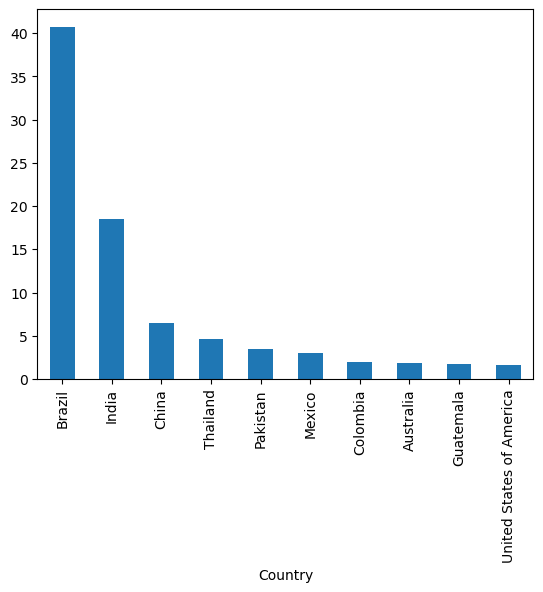

In [31]:
df_new['Percentage'].head(10).plot(kind='bar')

Highest Land

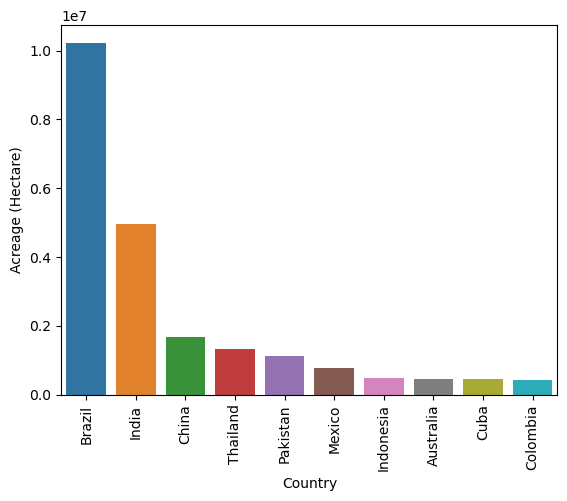

In [32]:
df_acr = df.sort_values('Acreage (Hectare)',ascending=False)
ax = sns.barplot(data = df_acr.head(10), x = 'Country', y ='Acreage (Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

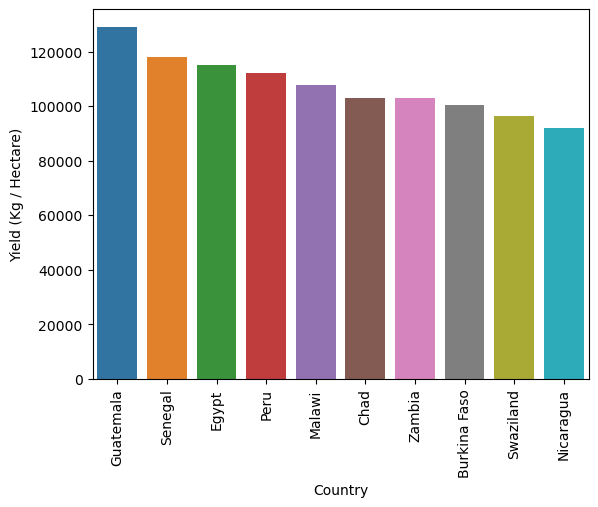

In [33]:
df_yield = df.sort_values('Yield (Kg / Hectare)',ascending=False)
ax = sns.barplot(data = df_yield.head(10), x = 'Country', y ='Yield (Kg / Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

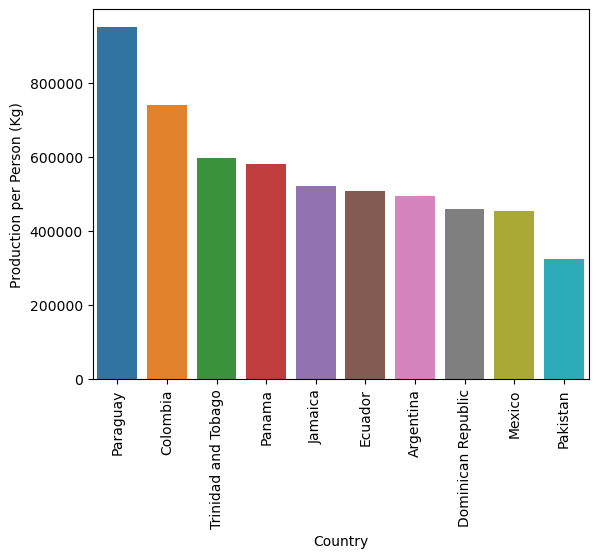

In [34]:
df_ppp = df.sort_values('Production per Person (Kg)',ascending=False)
ax = sns.barplot(data = df_ppp.head(10), x = 'Country', y ='Production per Person (Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Correlation

In [35]:
df_corr = df[['Production (Tons)','Production per Person (Kg)','Acreage (Hectare)','Yield (Kg / Hectare)']]

In [36]:
df_corr.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.015000,0.997550,0.132812
Production per Person (Kg),0.015000,1.000000,0.012557,0.017999
Acreage (Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

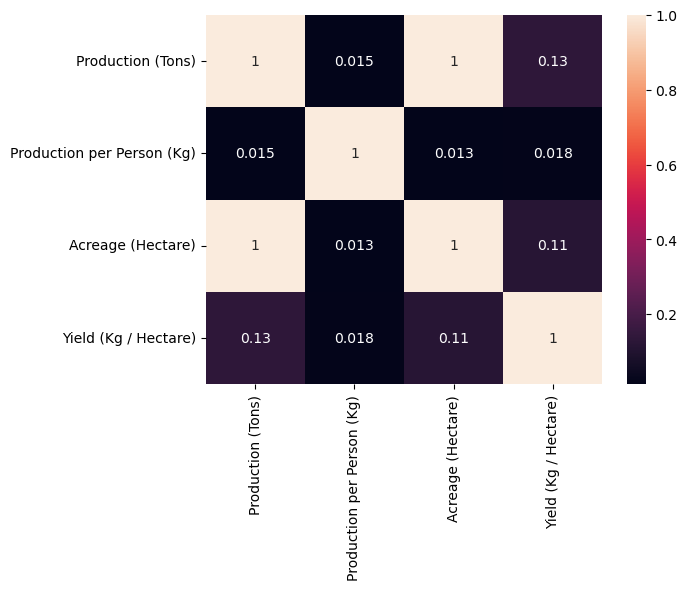

In [37]:
sns.heatmap(df_corr.corr(),annot=True)

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

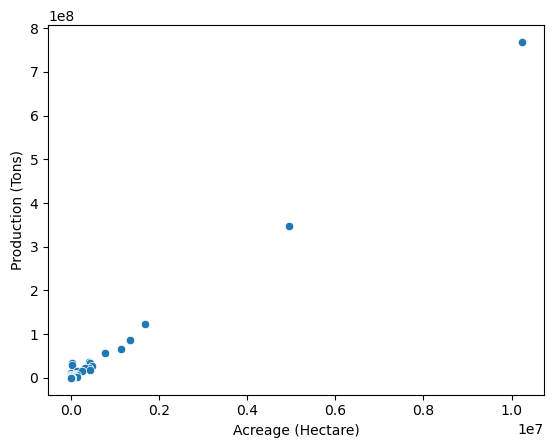

In [38]:
sns.scatterplot(data=df,x='Acreage (Hectare)',y='Production (Tons)')

In [39]:
df_cont = df.groupby('Continent').sum()

In [40]:
df_cont

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


<Axes: xlabel='Continent'>

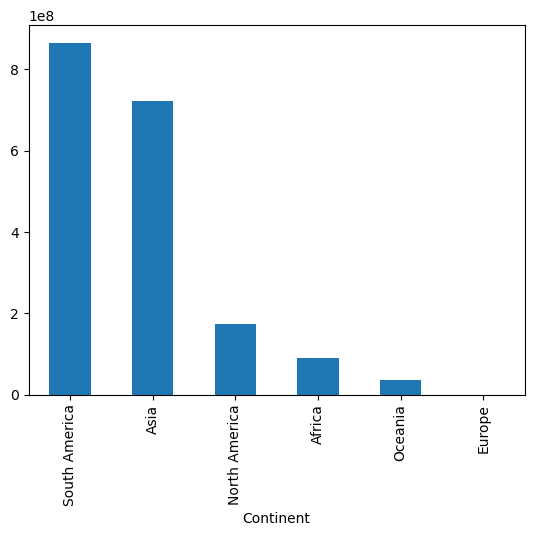

In [41]:
df_cont['Production (Tons)'].sort_values(ascending=False).plot(kind='bar')

In [42]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

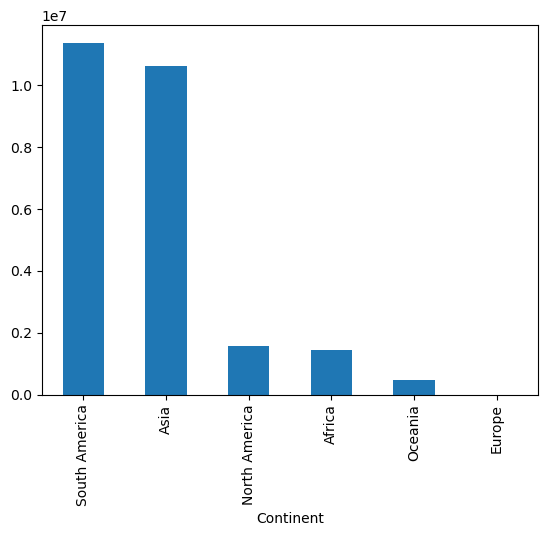

In [43]:
df_cont['Acreage (Hectare)'].sort_values(ascending=False).plot(kind='bar')

In [44]:
df_cont['Number of Countries'] = df.groupby('Continent').count()['Country']

In [49]:
df_cont.drop('Country',axis=1,inplace=True)

In [50]:
df_cont

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Number of Countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


In [51]:
continent_names = df_cont.index.to_list()

In [52]:
continent_names

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

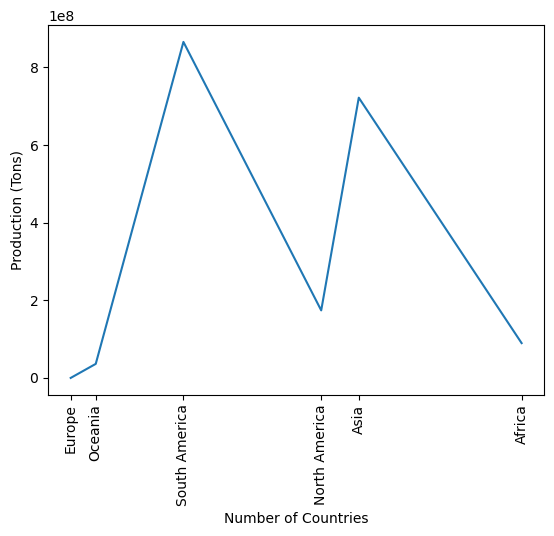

In [56]:
sns.lineplot(data=df_cont,x='Number of Countries',y='Production (Tons)')
plt.xticks(df_cont['Number of Countries'],continent_names,rotation=90)
plt.show()

In [57]:
df_cont.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Number of Countries
Production (Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production per Person (Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage (Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield (Kg / Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Number of Countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: ylabel='Production (Tons)'>

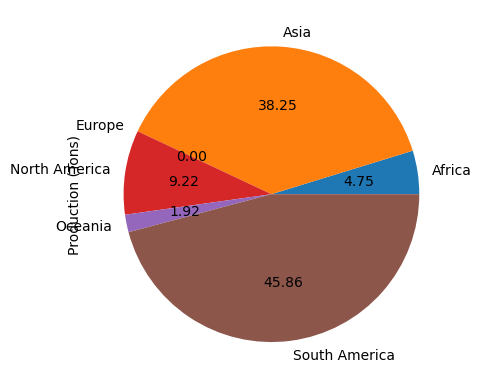

In [60]:
df_cont['Production (Tons)'].plot(kind='pie',autopct='%.2f')